In [4]:
import sys
lib_dir = r'/home/fra/Project/pyProj/statlib'
sys.path.append(lib_dir)

In [13]:
import numpy as np
from collections import Counter 

In [7]:
import learn_metropolis as lm

### set target distribution

In [23]:
target_dist = dict()
for k in range(7):
    target_dist[k+1] = k+1

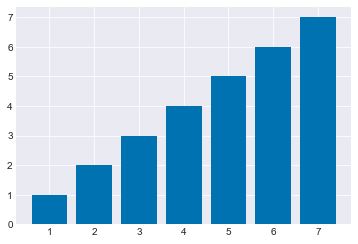

In [24]:
lm.plot_discrete_pmf(target_dist)

### run random walk simulation

In [25]:
theta = 4
num_steps = 100
hist = np.zeros(100)
hist[0] = theta
for idx in range(1, num_steps):
    current_param = hist[idx-1]
    hist[idx] = lm.next_param(current_param, target_dist)
    

In [26]:
cnt = Counter(hist)

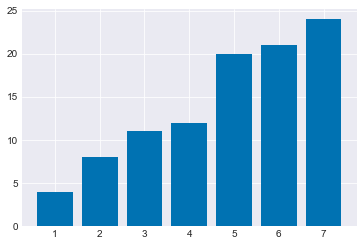

In [27]:
lm.plot_discrete_pmf(dict(cnt))

### alternative target dist

In [28]:
target_dist = dict(zip(range(1, 7), np.random.permutation(7) + 1))

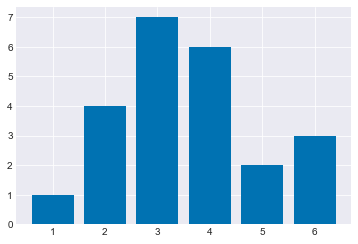

In [30]:
lm.plot_discrete_pmf(target_dist)

In [31]:
hist = lm.run_metropolis(4, 500, target_dist)

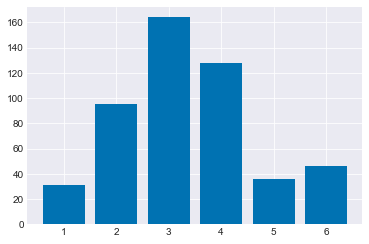

In [33]:
cnt = Counter(hist)
lm.plot_discrete_pmf(dict(cnt))

In [34]:
from imp import reload

In [56]:
reload(lm)

<module 'learn_metropolis' from '/home/fra/Project/pyProj/statlib/learn_metropolis.py'>

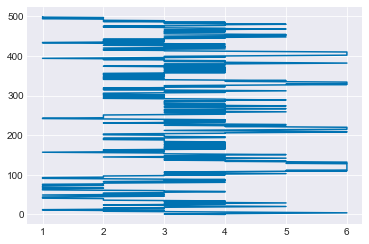

In [36]:
lm.plot_trajectory(hist)

In [54]:
lm.get_prob_from_hist(hist)

{4.0: 0.256, 3.0: 0.328, 5.0: 0.072, 6.0: 0.092, 2.0: 0.19, 1.0: 0.062}

In [50]:
target_dist

{1: 1, 2: 4, 3: 7, 4: 6, 5: 2, 6: 3}

In [55]:
lm.normalize_dist(target_dist)

{1: 0.043478260869565216,
 2: 0.17391304347826086,
 3: 0.30434782608695654,
 4: 0.2608695652173913,
 5: 0.08695652173913043,
 6: 0.13043478260869565}

### Get theoretical random walk metropolis posterior distribution

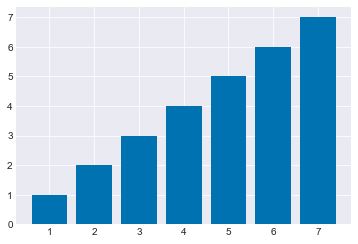

In [57]:
for k in range(7):
    target_dist[k+1] = k+1

lm.plot_discrete_pmf(target_dist)

setup

In [58]:
prior_dist = lm.create_zero_pmf(7)
theta = 4
num_steps = 3
prior_dist[theta] = 1

In [60]:
result = lm.metroplis_random_walk(num_steps, prior_dist, target_dist)

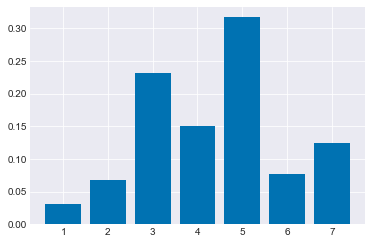

In [61]:
lm.plot_discrete_pmf(result)

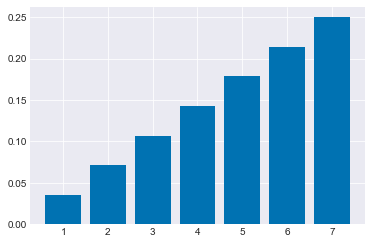

In [62]:
result = lm.metroplis_random_walk(100, prior_dist, target_dist)
lm.plot_discrete_pmf(result)

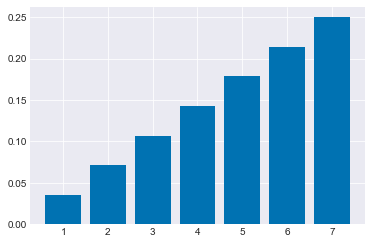

In [64]:
lm.plot_discrete_pmf(lm.normalize_dist(target_dist))